# MATH 210 Introduction to Mathematical Computing

**April 3, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Least Squares Linear Regression

Let $\mathbf{x}$ and $\mathbf{y}$ be vectors of length $N$ consisting of $x$ and $y$ values. Choose a linear model $f(x) = c_0 + c_1 x$. The vector of coefficients $\mathbf{c}$ which best fits the data by minimizing $\| \mathbf{y} - A\mathbf{c} |$ is the solution of the normal equations:

$$
A^T A \mathbf{c} = A^T \mathbf{y}
$$

where:

$$
A = \begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_{N-1} \end{bmatrix}
$$

Construct some fake data and try to recover the coefficients from the normal equations:

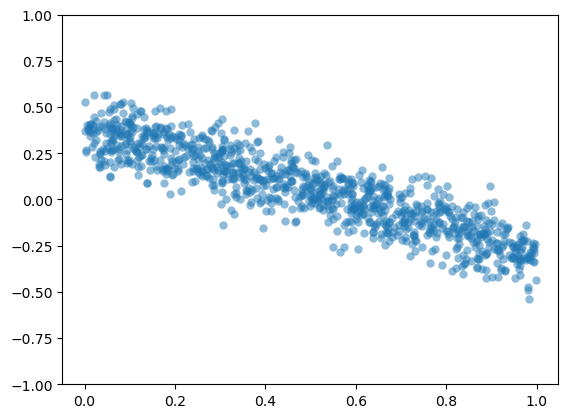

In [61]:
N = 1000
x = np.random.rand(N)
error = 0.1*np.random.randn(N)
y = 0.4 - 0.7*x + error
plt.scatter(x,y,alpha=0.5,lw=0)
plt.ylim([-1,1])
plt.show()

In [62]:
A = np.column_stack([np.ones(N),x])

In [63]:
A.shape

(1000, 2)

In [64]:
A[:5,:]

array([[1.        , 0.81944654],
       [1.        , 0.58966044],
       [1.        , 0.59121279],
       [1.        , 0.87648744],
       [1.        , 0.02420114]])

In [65]:
c = la.solve(A.T@A,A.T@y)

In [66]:
c

array([ 0.39438184, -0.68560121])

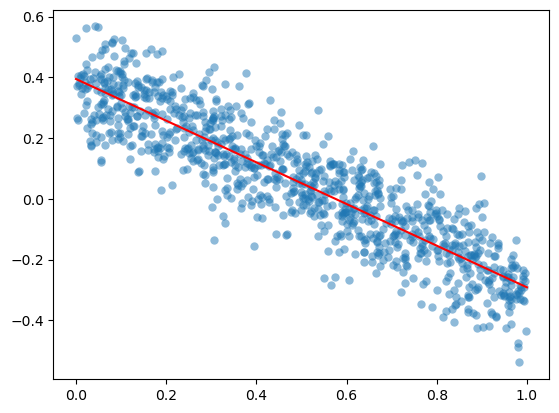

In [67]:
X = np.linspace(0,1,10)
Y = c[0] + c[1]*X
plt.scatter(x,y,alpha=0.5,lw=0)
plt.plot(X,Y,'r')
plt.show()

## Data Fitting

Let $\mathbf{x}$ and $\mathbf{y}$ be vectors of length $N$ consisting of $x$ and $y$ values. Choose a general linear model

$$
f(x) = c_0f_0(x) + c_1 f_1(x) + \cdots + c_d f_d(x)
$$

where $f_0,\dots,f_d$ are specific chosen functions. The vector of coefficients $\mathbf{c}$ which best fits the data by minimizing $\| \mathbf{y} - A\mathbf{c} |$ is the solution of the normal equations:

$$
A^T A \mathbf{c} = A^T \mathbf{y}
$$

where:

$$
A = \begin{bmatrix} & & & \\ f_0(\mathbf{x}) & f_1(\mathbf{x}) & \cdots & f_d(\mathbf{x}) \\ & & & \end{bmatrix}
$$

Create some fake data using a quadratic function:

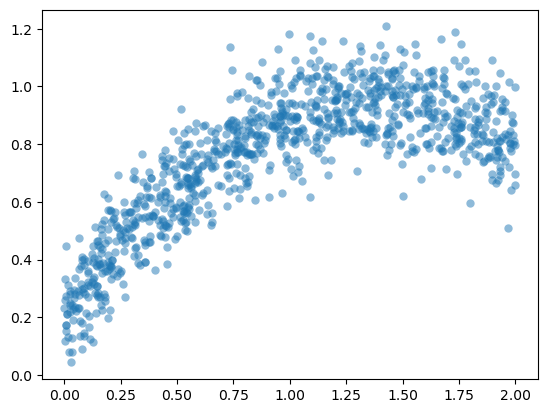

In [68]:
N = 1000
x = 2*np.random.rand(N)
error = 0.1*np.random.randn(N)
y = 0.2 + 1.1*x - 0.4*x**2 + error
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

Choose a model $f(x) = c_0 + c_1 x + c_2 x^2$.

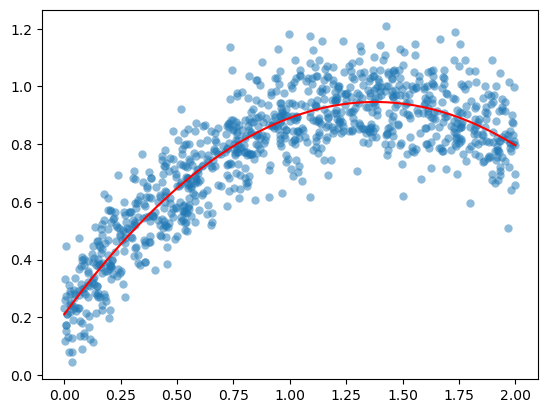

In [69]:
A = np.column_stack([np.ones(N),x,x**2])
c = la.solve(A.T@A,A.T@y)

X = np.linspace(0,2,50)
Y = c[0] + c[1]*X + c[2]*X**2
plt.scatter(x,y,alpha=0.5,lw=0)
plt.plot(X,Y,'r')
plt.show()

Choose a model $f(x) = c_0 + c_1 x + c_2 x^3$.

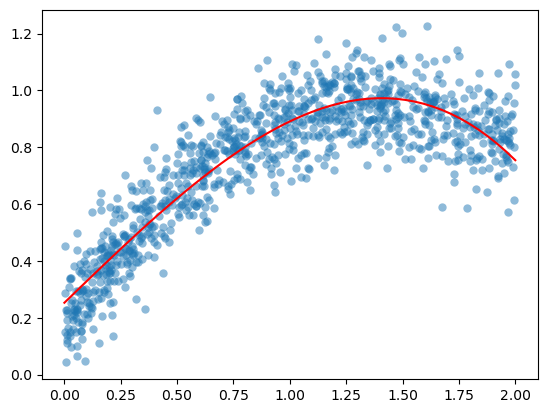

In [32]:
A = np.column_stack([np.ones(N),x,x**3])
c = la.solve(A.T@A,A.T@y)

X = np.linspace(0,2,50)
Y = c[0] + c[1]*X + c[2]*X**3
plt.scatter(x,y,alpha=0.5,lw=0)
plt.plot(X,Y,'r')
plt.show()

Choose a model $f(x) = c_0 + c_1 \sin(x) + c_2 \cos(x)$.

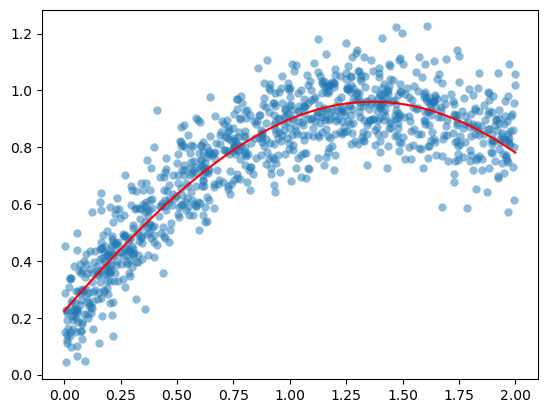

In [33]:
A = np.column_stack([np.ones(N),np.sin(x),np.cos(x)])
c = la.solve(A.T@A,A.T@y)

X = np.linspace(0,2,50)
Y = c[0] + c[1]*np.sin(X) + c[2]*np.cos(X)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.plot(X,Y,'r')
plt.show()

## Weather Data

The file `weather.csv` includes daily average temperature and precipitation from 1997 to 2022.

In [95]:
import pandas as pd

In [96]:
df = pd.read_csv('weather.csv')

In [97]:
df.head()

,year,month,day,avg_temperature,precipitation,dayofyear
0,2022,12,31,5.90,3.8,365
1,2022,12,30,7.80,12.7,364
2,2022,12,29,4.84,2.9,363
3,2022,12,28,5.80,3.8,362
4,2022,12,27,8.10,28.8,361


In [98]:
df.tail()

,year,month,day,avg_temperature,precipitation,dayofyear
9491,1997,1,5,2.60,0.0,5
9492,1997,1,4,3.85,1.0,4
9493,1997,1,3,3.85,0.0,3
9494,1997,1,2,7.45,15.4,2
9495,1997,1,1,7.35,11.4,1


Select the day of the year as the $x$ values and average temperature as the $y$ values.

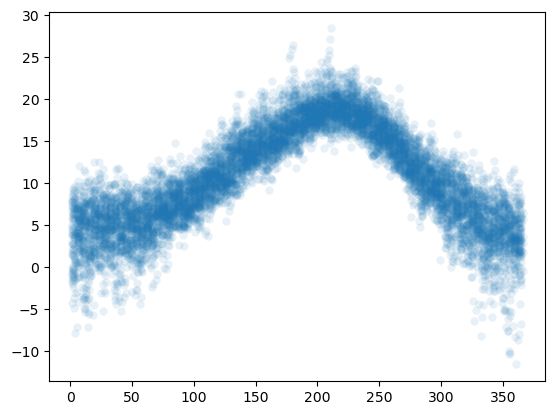

In [99]:
x = df['dayofyear'].values
y = df['avg_temperature'].values
plt.scatter(x,y,alpha=0.1,lw=0)
plt.show()

Choose $w$ to construct a model

$$
f(x) = c_0 + c_1\sin(wx) + c_2\cos(wx)
$$

for the data and fit the model.

In [ ]:
w = 
A = 
c = la.solve(A.T@A,A.T@y)

X = np.linspace(0,365,100)
Y = c[0] + c[1]*np.sin(w*X) + c[2]*np.cos(w*X)

plt.scatter(x,y,alpha=0.1,lw=0)
plt.plot(X,Y,'r')
plt.show()

Perhaps there are more than 1 frequency to consider. Choose $w_0$ and $w_1$ to construct a model

$$
f(x) = c_0 + c_1\sin(w_0x) + c_2\cos(w_0x)+ c_1\sin(w_1x) + c_2\cos(w_1x)
$$

for the data and fit the model.